# Prepare

In [1]:
# pip list
import tensorflow as tf
import cv2 # openCV for real time computer vision
import imghdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Remove bad images

In [2]:
data_dir = "data"
image_exts = ['jpeg','jpg', 'bmp', 'png']

bikes_dir = os.listdir("data")[1:] # list all the directories inside the data folder
motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder

print("original bicycle length:",len(bicycle))
print("original motorcycle length:",len(motorcycle))

original bicycle length: 77
original motorcycle length: 83


In [3]:
for direct in bikes_dir:
    img_arr = pd.Series(os.listdir(os.path.join(data_dir, direct))) # atempt to rmove .ipynb_checkpoints from list of images
    for img in list(img_arr[~img_arr.isin([".ipynb_checkpoints"])]): # find the list of all images in each data folder
        img_path = os.path.join(data_dir,direct, img) # join full image path together
        try:
            image = cv2.imread(img_path) # read image as np array
            tip = imghdr.what(img_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(img_path))
                os.remove(img_path)
        except:
            print('Issue with image {}'.format(img_path))

motorcycle = os.listdir(os.path.join("data", "motorcycle")) # find the list of all images in each data folder
bicycle = os.listdir(os.path.join("data", "bicycle")) # find the list of all images in each data folder
print("original bicycle length:",len(bicycle))
print("original motorcycle length:",len(motorcycle))

libpng warning: iCCP: known incorrect sRGB profile


original bicycle length: 77
original motorcycle length: 83


**image to array example**

In [4]:
# example reading image as np array
img_arr_ex = cv2.imread(os.path.join("data", "bicycle","000019.jpg"))
img_arr_ex[1]

array([[184, 168, 162],
       [208, 192, 186],
       [230, 214, 208],
       ...,
       [  4,  15,  13],
       [  2,  13,  11],
       [  0,  12,  10]], dtype=uint8)

In [5]:
# 1167 pixels high
# 2000 pixels wide
# 3 chanels (colored picture)
img_arr_ex.shape

(1333, 2000, 3)

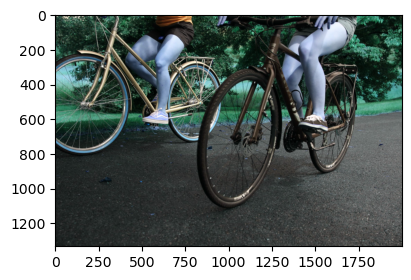

In [6]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(img_arr_ex)
plt.show()

**fix color**

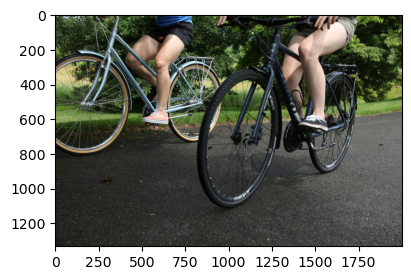

In [7]:
# plot the image
plt.figure(figsize = (5,3))
plt.imshow(cv2.cvtColor(img_arr_ex, cv2.COLOR_BGR2RGB))
plt.show()

## Load data

In [8]:
# Build image dataset using keras image data set 
data = tf.keras.utils.image_dataset_from_directory("data") # data is the directory whre the image files are located
bikes = data

Found 158 files belonging to 2 classes.


In [9]:
# convert the image dataset object to numpy arrays using an iterator
bikes = bikes.as_numpy_iterator()
bikes # you can loop through this iterator and get baches of data using the numpy next operator

**Batch return s two things:**

- The images
- The label: Determins if an image is a bicycle or a motorcycle (0,1)

In [10]:
# use the next operator to get a batch of data
batch = bikes.next()

2023-08-24 18:39:48.445009: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


**Images**

Each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

In [11]:
# get all the images from the batch
batch[0].shape
# each batch contains 32 images and contrain a consistance image size of 256 pixels and colored images

(32, 256, 256, 3)

**labels**

Which number represent bicycle and which represent motorcycle?
- `0`: Bicycle 
- `1`: Motorcyle

In [12]:
batch[1]

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [13]:
data.class_names

['bicycle', 'motorcycle']

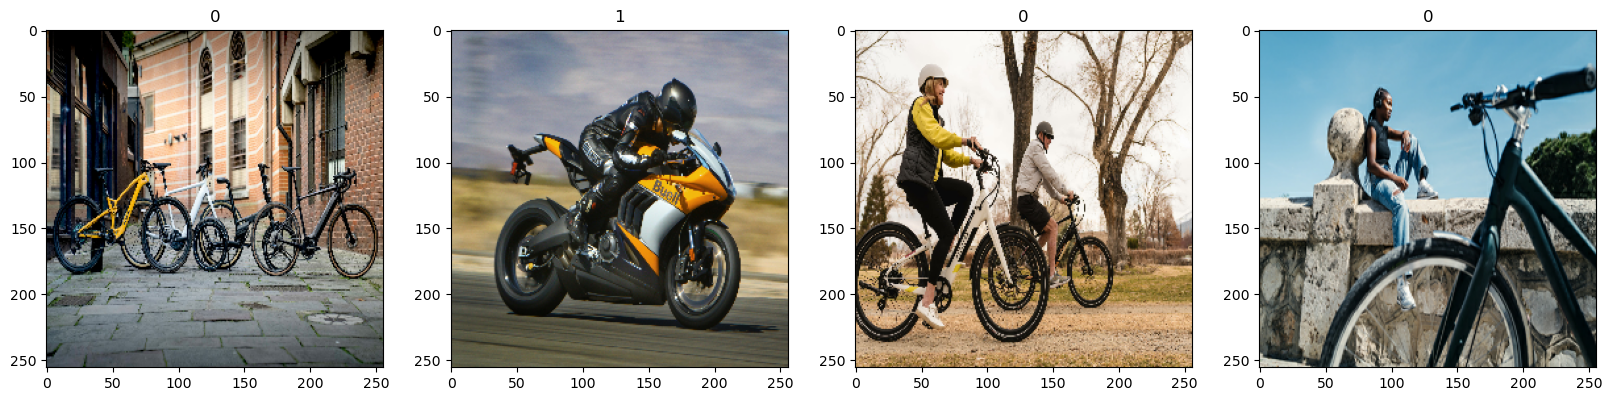

In [14]:
# determin wheater a image is motorcycle or bicycle
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Scaling

In [17]:
# devide by 255 pixels
data = data.map(lambda x,y: (x/255, y))

# Get an iterator over the dataset
data_iterator = data.as_numpy_iterator()

# Get the first element from the iterator
data = next(data_iterator)

2023-08-24 18:40:51.103798: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


## Split Data

In [23]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

AttributeError: 'tuple' object has no attribute 'take'